# LP IV - Assignment 3

Name    : Isha Kanade <br>
Roll no : 43135 <br>
Batch   : Q - 9

### Problem statement :
Build the image classification model

    1. Loading and preprocessing the img data
    2. defining the model arch
    3. train
    4. estimate performance

In [27]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

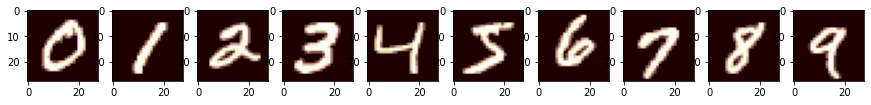

In [11]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(15,15))

for i in range(0, num_classes):
  sample = train_images[train_labels == i][0]
  ax[i].imshow(sample, cmap='pink')

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train / 255.0
x_test= x_test /255.0
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4732)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               605824    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [16]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0866 - accuracy: 0.9786
Epoch 2/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0533 - accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0382 - accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0308 - accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0260 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0242 - accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0199 - accuracy: 0.9933
Epoch 8/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0189 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0154 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 27s 14m

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0613 - accuracy: 0.9852


[0.06127379834651947, 0.9851999878883362]

In [32]:
print(history.history)

{'loss': [0.08661922812461853, 0.053292881697416306, 0.03824302554130554, 0.030844079330563545, 0.0259780902415514, 0.024217890575528145, 0.01994616910815239, 0.018896745517849922, 0.015400832518935204, 0.015177497640252113], 'accuracy': [0.978600025177002, 0.9838833212852478, 0.9875666499137878, 0.9897500276565552, 0.9916166663169861, 0.9913166761398315, 0.9933333396911621, 0.9934666752815247, 0.9946833252906799, 0.9945499897003174]}


8


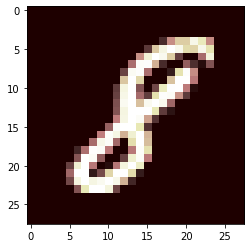

In [45]:
print(y_train[7777]) # The label is 8
plt.imshow(x_train[7777], cmap='pink')

3


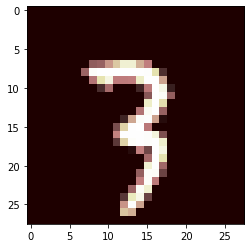

In [46]:
image_index = 4435
plt.imshow(x_test[image_index].reshape(28, 28),cmap='pink')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

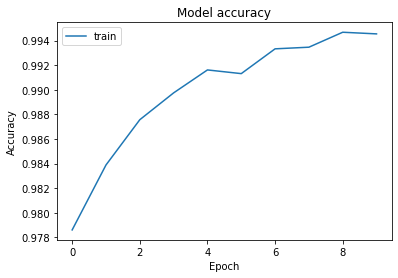

In [33]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

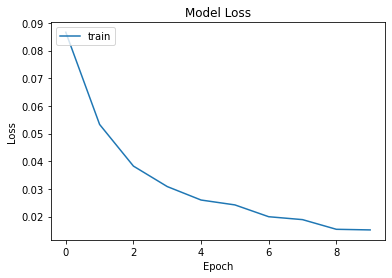

In [34]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()